## Scenario

A tech startup wants to launch a new mobile app on the Google Play Store

###### Key GTM Questions

Which category has the highest opportunity for growth?

What features (size, update frequency, type) correlate with high installs?

How should the app be priced?

What drives better ratings and customer satisfaction?

Who are the market leaders and how can we compete?

###### Loading Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

###### Loading data

In [4]:
df = pd.read_csv("cleaned.csv")

In [5]:
# view head
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  float64
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


###### Market Landscape Analysis

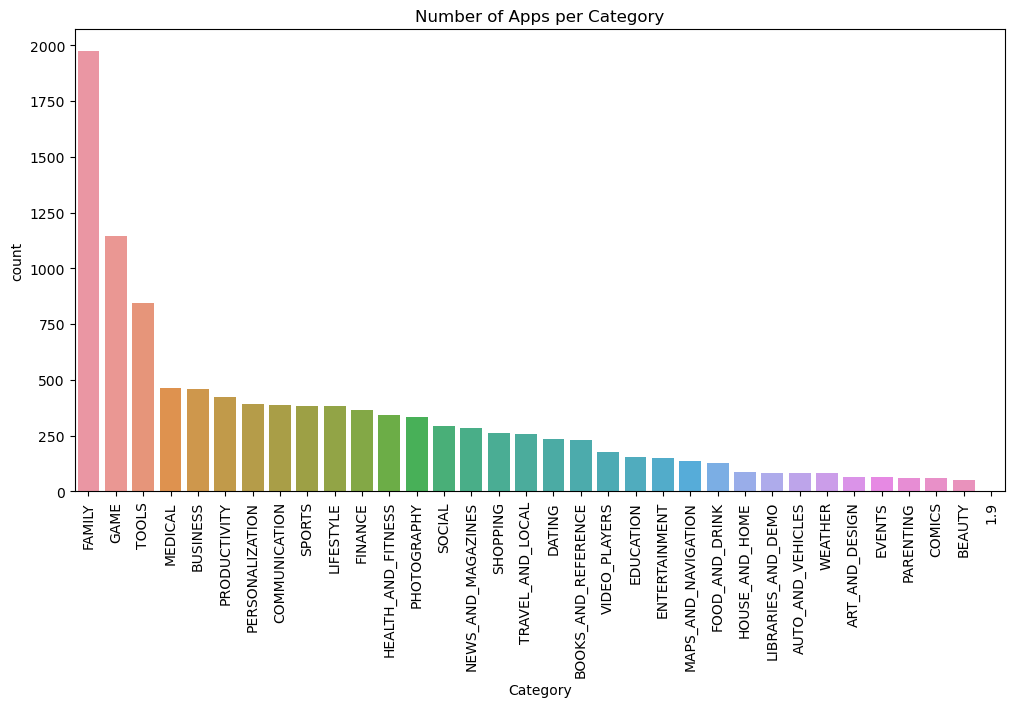

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of Apps per Category")
plt.show()

###### Average rating per Category

In [9]:
category_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
category_rating

Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
LIFESTYLE               4.094904
V

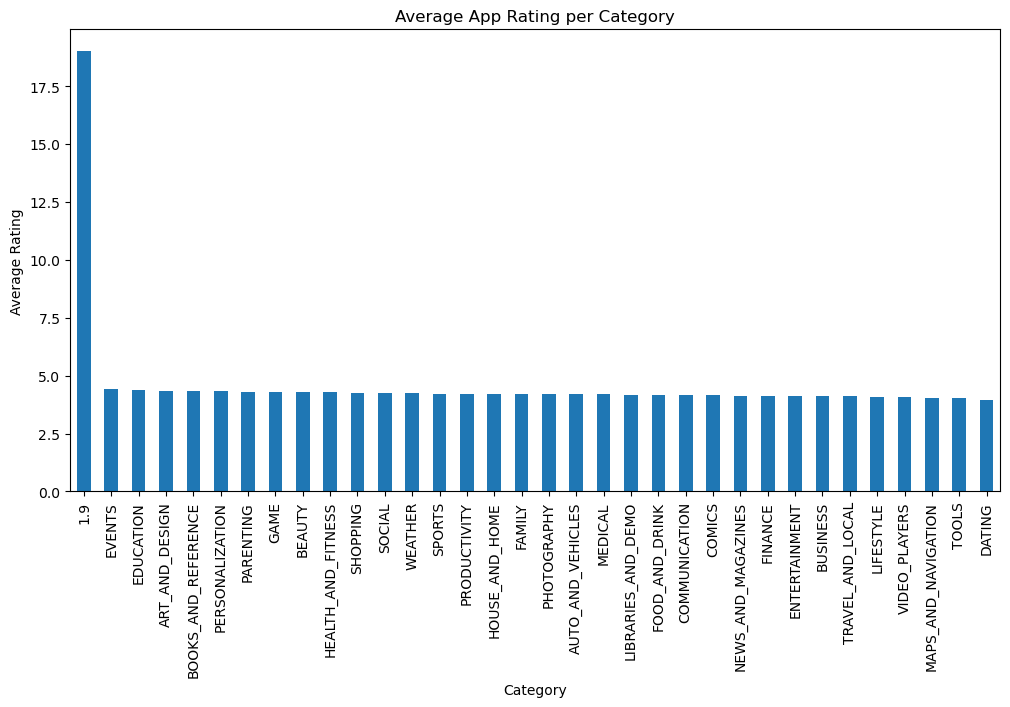

In [8]:

plt.figure(figsize=(12,6))
category_rating.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel("Average Rating")
plt.title("Average App Rating per Category")
plt.show()

###### Average Price per Category

In [10]:
category_price = df.groupby('Category')['Price'].mean().sort_values(ascending=False)
category_price

Category
FINANCE                7.925765
LIFESTYLE              6.180288
MEDICAL                3.110065
EVENTS                 1.718594
FAMILY                 1.234675
PRODUCTIVITY           0.591816
BOOKS_AND_REFERENCE    0.518485
BUSINESS               0.402761
PHOTOGRAPHY            0.400627
WEATHER                0.395366
PERSONALIZATION        0.392755
TOOLS                  0.317023
SPORTS                 0.260417
GAME                   0.251136
COMMUNICATION          0.214832
HEALTH_AND_FITNESS     0.197478
MAPS_AND_NAVIGATION    0.196715
TRAVEL_AND_LOCAL       0.193605
PARENTING              0.159667
AUTO_AND_VEHICLES      0.158471
DATING                 0.134316
EDUCATION              0.115128
ART_AND_DESIGN         0.091846
FOOD_AND_DRINK         0.066772
VIDEO_PLAYERS          0.059771
SOCIAL                 0.054136
ENTERTAINMENT          0.053557
SHOPPING               0.021077
NEWS_AND_MAGAZINES     0.014064
LIBRARIES_AND_DEMO     0.011647
1.9                    0.000000

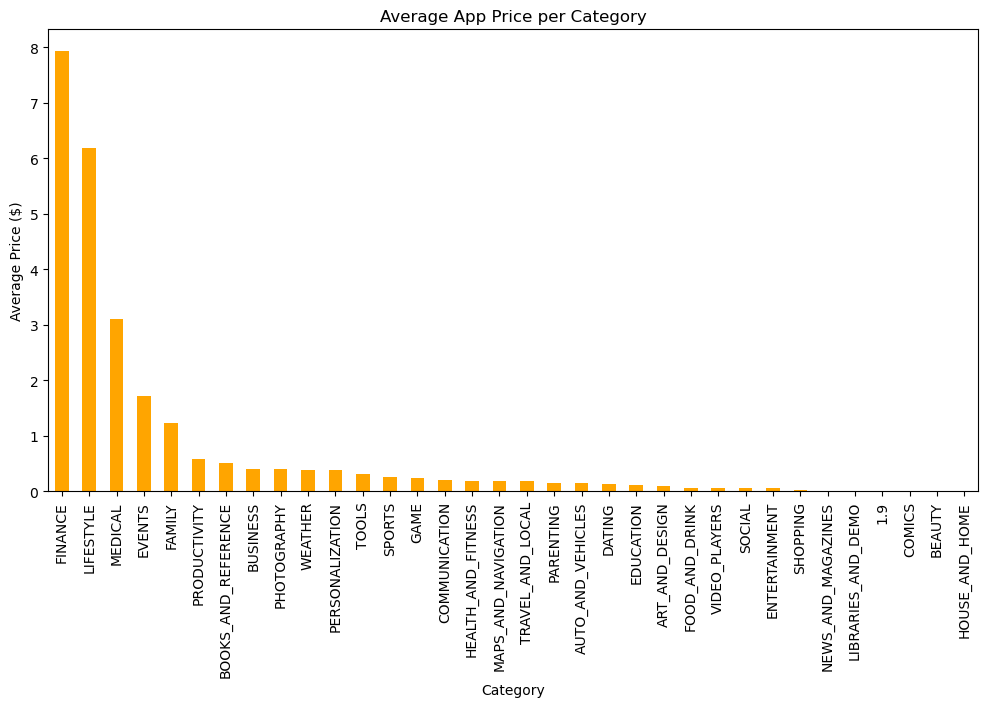

In [11]:
# Visualization
plt.figure(figsize=(12,6))
category_price.plot(kind='bar', color='orange')
plt.xticks(rotation=90)
plt.ylabel("Average Price ($)")
plt.title("Average App Price per Category")
plt.show()


###### Segmentation Analysis

Segmenting the market by:

Price Tier (Free vs Paid)

Popularity Tier (Installs)

Rating Tier (Rating)

In [12]:
# Add a Price Tier column
df['Price Tier'] = df['Price'].apply(lambda x: 'Free' if x==0 else 'Paid')

# Add Popularity Tier
df['Popularity Tier'] = pd.qcut(df['Installs'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Cross-tab of Price vs Category
pd.crosstab(df['Category'], df['Price Tier'])


Price Tier,Free,Paid
Category,,
1.9,1,0
ART_AND_DESIGN,62,3
AUTO_AND_VEHICLES,82,3
BEAUTY,53,0
BOOKS_AND_REFERENCE,203,28
BUSINESS,446,14
COMICS,60,0
COMMUNICATION,360,27
DATING,227,7


###### Visualizing Popularity (Installs) Across Categories

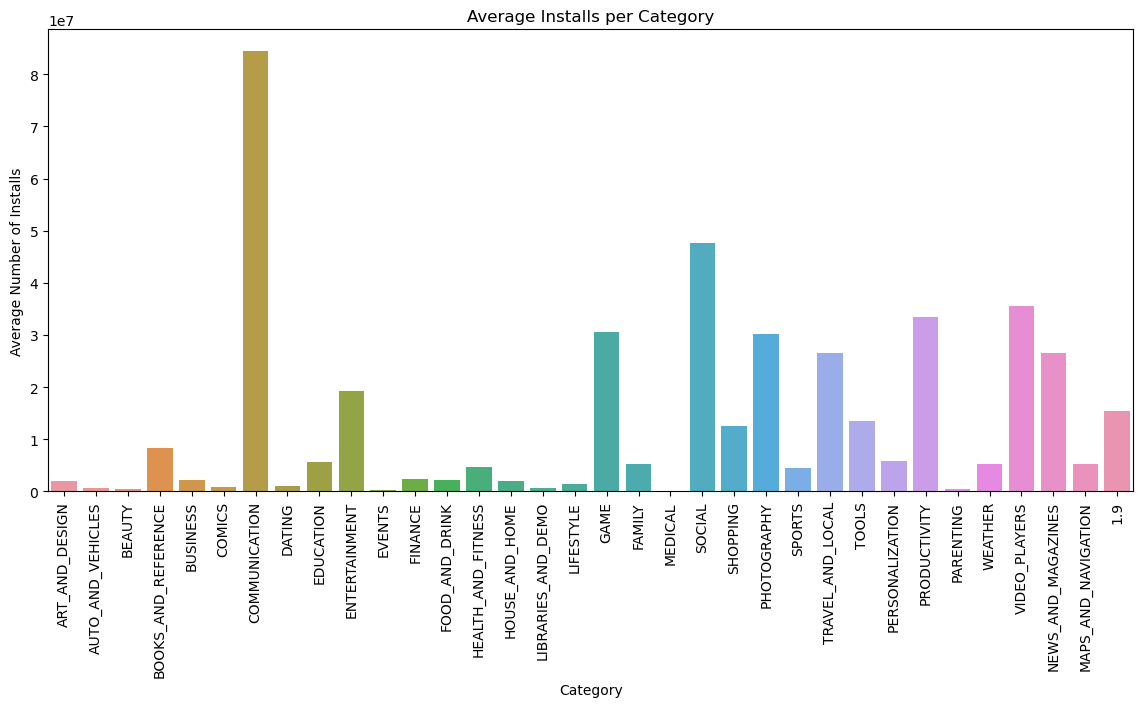

In [13]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='Category', y='Installs', estimator='mean', ci=None)
plt.xticks(rotation=90)
plt.title("Average Installs per Category")
plt.ylabel("Average Number of Installs")
plt.show()

###### Price Analysis

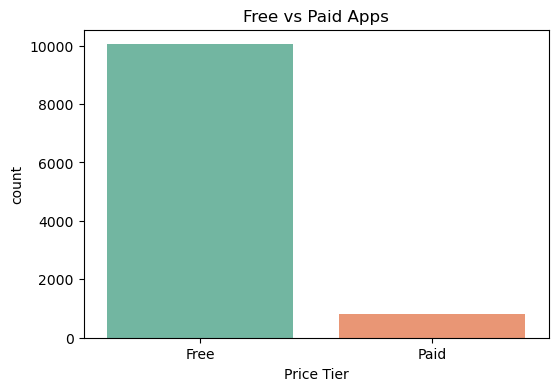

In [14]:
#distribution of free vs paid
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Price Tier', palette='Set2')
plt.title("Free vs Paid Apps")
plt.show()

###### Price distribution for paid apps

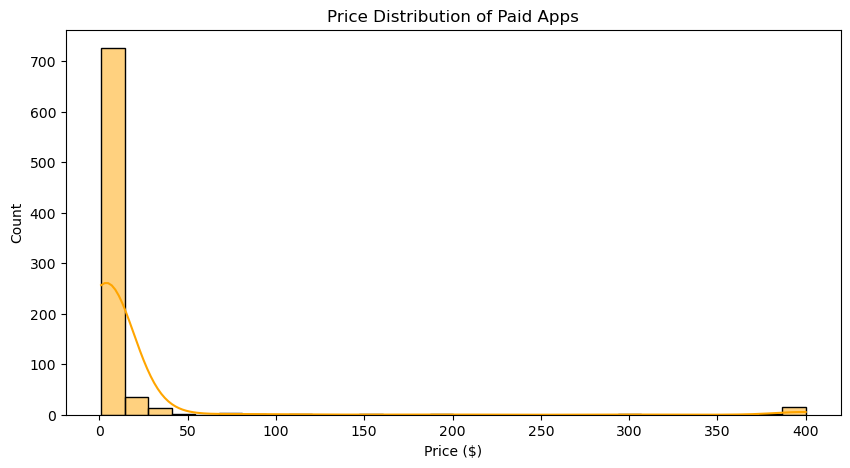

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Price Tier']=='Paid']['Price'], bins=30, kde=True, color='orange')
plt.title("Price Distribution of Paid Apps")
plt.xlabel("Price ($)")
plt.show()

###### Rating Analysis

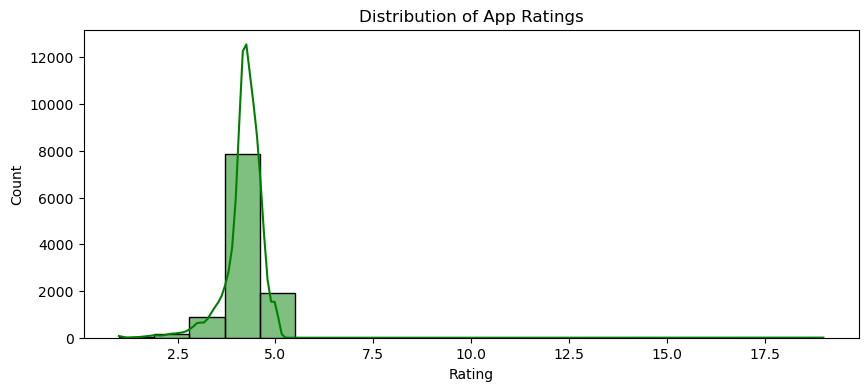

In [16]:
# Rating distribution overall
plt.figure(figsize=(10,4))
sns.histplot(df['Rating'], bins=20, kde=True, color='green')
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.show()

###### Rating Vs Category

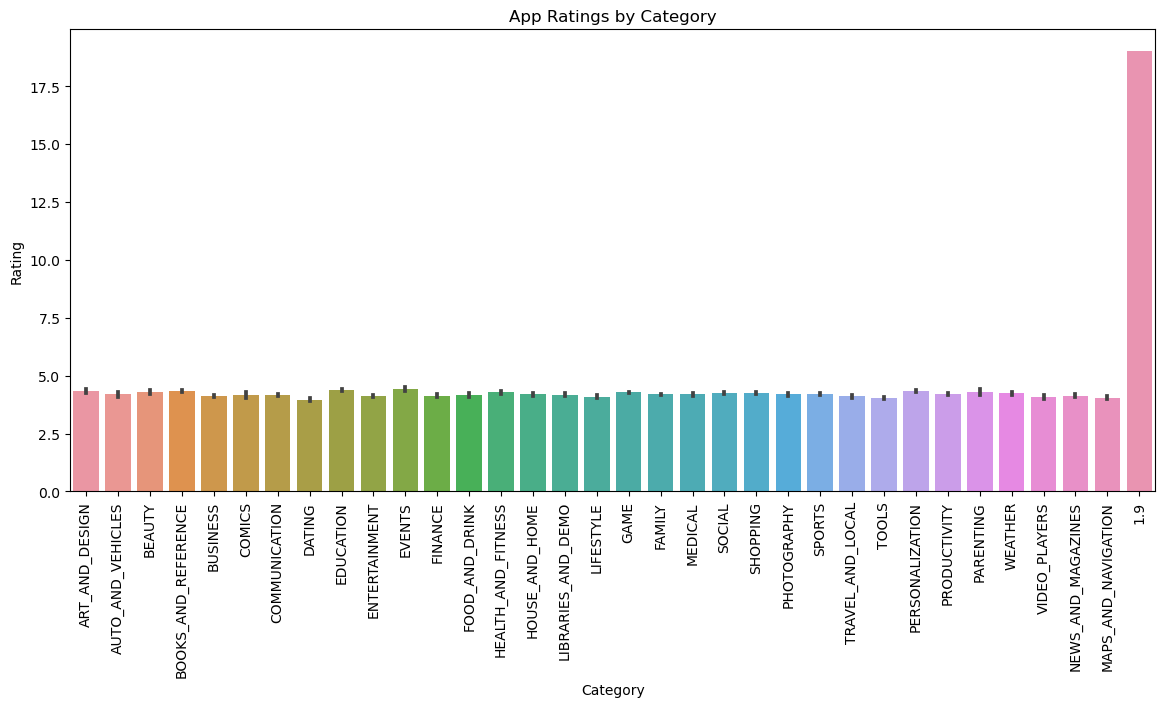

In [19]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='Category', y='Rating')
plt.xticks(rotation=90)
plt.title("App Ratings by Category")
plt.show()

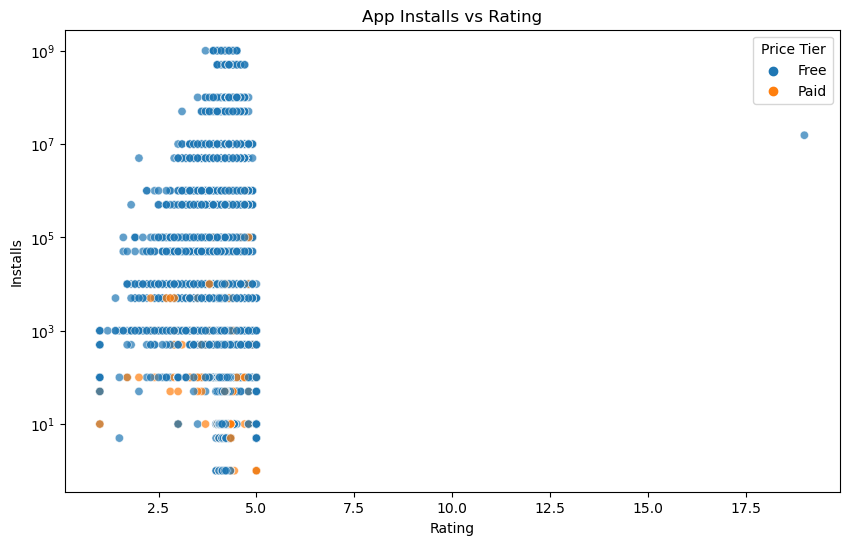

In [22]:
#popularity vs rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Rating', y='Installs', hue='Price Tier', alpha=0.7)
plt.title("App Installs vs Rating")
plt.yscale('log') 
plt.show()

###### Update Recency Analysis

In [24]:
from datetime import datetime

# Convert to datetime, coerce errors to NaT
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Fill NaT with median date
df['Last Updated'] = df['Last Updated'].fillna(df['Last Updated'].median())

# Now calculate days since last update
df['Days Since Update'] = (datetime.now() - df['Last Updated']).dt.days

# Quick check
df[['Last Updated', 'Days Since Update']].head()

,Last Updated,Days Since Update
0,2018-01-07,2894
1,2018-01-15,2886
2,2018-08-01,2688
3,2018-06-08,2742
4,2018-06-20,2730


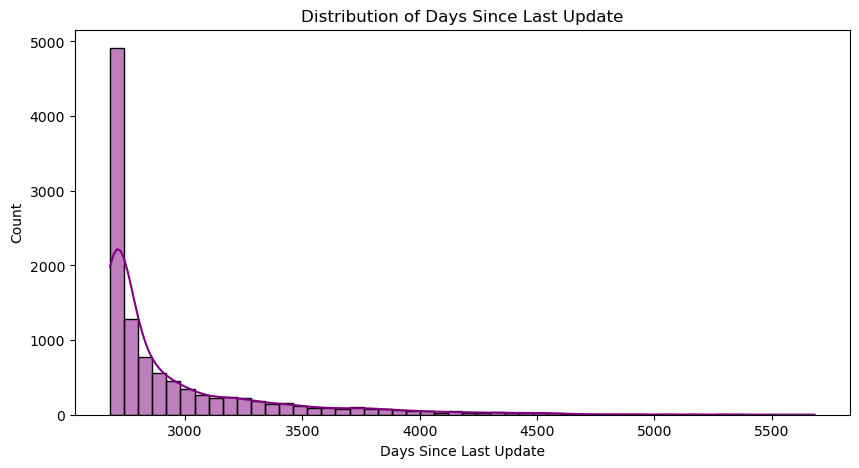

In [25]:
#Visualization

plt.figure(figsize=(10,5))
sns.histplot(df['Days Since Update'], bins=50, color='purple', kde=True)
plt.title("Distribution of Days Since Last Update")
plt.xlabel("Days Since Last Update")
plt.show()

###### GTM Insights Summary

From the analysis, we can extract key GTM insights:

Target Categories: Games, Family, Education, and Health apps dominate installs.

Pricing Strategy: Free apps dominate; paid apps must focus on high-value niche features.

Quality Focus: High ratings correlate with higher installs — UX and features matter.

Maintenance: Frequent updates are a signal of app reliability.

Segment Opportunities: Identify categories with low competition but good potential (high rating, moderate installs).

###### Segmentation Analysis

###### Segment Apps by popularity

In [26]:
# Define popularity tiers

def popularity_tier(installs):
    if installs < 10000:
        return "Low"
    elif installs < 100000:
        return "Medium"
    elif installs < 1000000:
        return "High"
    else:
        return "Very High"

df['Popularity Tier'] = df['Installs'].apply(popularity_tier)

# Quick check
df[['App', 'Installs', 'Popularity Tier']].head(10)


,App,Installs,Popularity Tier
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000.0,Medium
1,Coloring book moana,500000.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000.0,Very High
3,Sketch - Draw & Paint,50000000.0,Very High
4,Pixel Draw - Number Art Coloring Book,100000.0,High
5,Paper flowers instructions,50000.0,Medium
6,Smoke Effect Photo Maker - Smoke Editor,50000.0,Medium
7,Infinite Painter,1000000.0,Very High
8,Garden Coloring Book,1000000.0,Very High
9,Kids Paint Free - Drawing Fun,10000.0,Medium


###### Segment Apps by Price

In [28]:
df['Price Tier'] = df['Price'].apply(lambda x: "Free" if x == 0 else "Paid")

# Count of free vs paid apps
df['Price Tier'].value_counts().to_frame()

,Price Tier
Free,10041
Paid,800


###### Insight:

Most apps are free, showing that freemium is the dominant GTM model.

Paid apps must target specific value niches.

###### Segment byb Ratings

In [29]:
def rating_tier(rating):
    if rating < 3.5:
        return "Low"
    elif rating < 4.0:
        return "Medium"
    elif rating < 4.5:
        return "High"
    else:
        return "Very High"

df['Rating Tier'] = df['Rating'].apply(rating_tier)

# Quick check
df[['App', 'Rating', 'Rating Tier']].head(10)


,App,Rating,Rating Tier
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,High
1,Coloring book moana,3.9,Medium
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,Very High
3,Sketch - Draw & Paint,4.5,Very High
4,Pixel Draw - Number Art Coloring Book,4.3,High
5,Paper flowers instructions,4.4,High
6,Smoke Effect Photo Maker - Smoke Editor,3.8,Medium
7,Infinite Painter,4.1,High
8,Garden Coloring Book,4.4,High
9,Kids Paint Free - Drawing Fun,4.7,Very High


###### Insight:

Apps with Very High rating are often the ones driving installs.

Low-rated apps may need improvement before launch

###### Combined Segment Analysis

In [30]:
# Average installs by Category and Popularity Tier
pivot_pop = df.pivot_table(index='Category', columns='Popularity Tier',
                           values='Installs', aggfunc='mean', fill_value=0)
pivot_pop


Popularity Tier,High,Low,Medium,Very High
Category,,,,
1.9,0.000000,0.000000,0.000000,1.546434e+07
ART_AND_DESIGN,196000.000000,2810.000000,24117.647059,9.153846e+06
AUTO_AND_VEHICLES,171428.571429,721.821429,28181.818182,2.666667e+06
BEAUTY,271428.571429,1550.000000,21111.111111,2.300000e+06
BOOKS_AND_REFERENCE,283783.783784,1245.583333,22972.972973,3.131148e+07
BUSINESS,197959.183673,604.941406,18275.862069,1.021649e+07
COMICS,225000.000000,3268.750000,25555.555556,2.888889e+06
COMMUNICATION,228571.428571,1127.241071,21428.571429,1.539623e+08
DATING,265079.365079,1121.074074,16250.000000,4.258621e+06


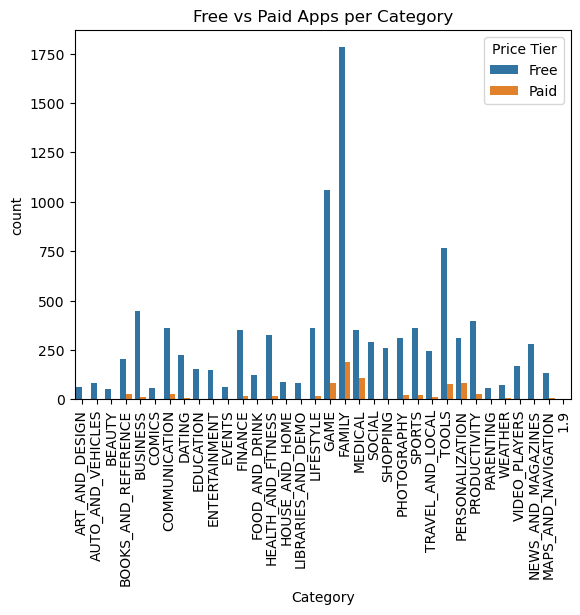

In [31]:
# Free vs Paid per Category
sns.countplot(data=df, x='Category', hue='Price Tier')
plt.xticks(rotation=90)
plt.title("Free vs Paid Apps per Category")
plt.show()


Insight:

All categories are mostly free (Games, Family, etc)

###### Segment Insights for GTM

Target High-Install Categories: Focus on categories with many “High” or “Very High” apps.

Pricing Strategy: Free apps dominate; if paid, emphasize unique features.

Quality Focus: High rating = higher installs. Low rating apps need UX improvement.

Niche Opportunities: Look for categories with medium popularity and high ratings — these are underserved.